In [2]:
import fastai

In [3]:
from fastai.vision.all import *

In [4]:
from fastai import vision

In [5]:
!nvidia-smi

Wed Nov 09 23:13:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.51       Driver Version: 457.51       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0  On |                  N/A |
| 35%   30C    P8    N/A /  75W |    803MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images')]

In [7]:
image=get_image_files(path/'images')
image

(#7390) [Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),Path('C:/Users/Aren/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg')...]

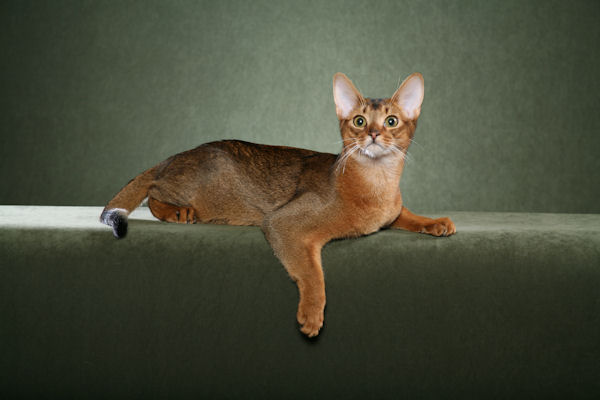

In [8]:
PILImage.create(image[0])

In [9]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, image, valid_pct=0.2, seed=69,
    label_func=is_cat, item_tfms=Resize(224), bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


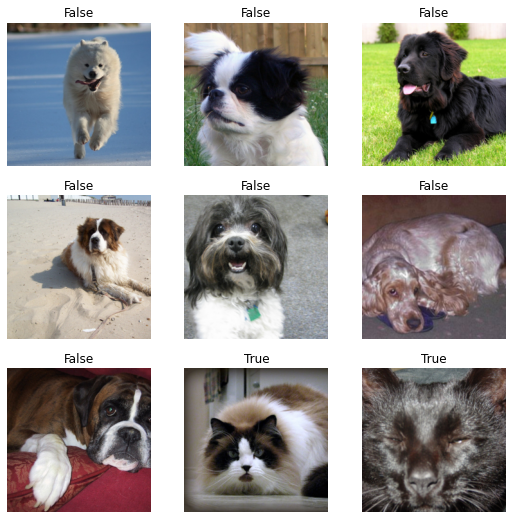

In [10]:
dls.show_batch()

In [24]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit(10)

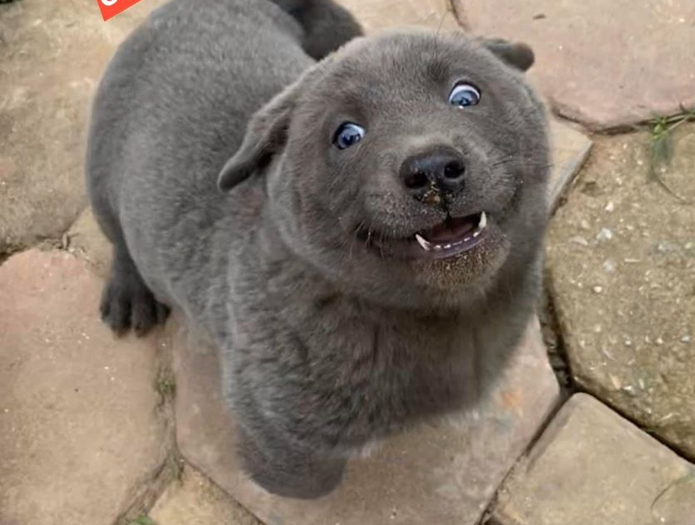

In [25]:
img = PILImage.create('C:/Users/Aren/Desktop/dog.png')
img

In [26]:
predict=learn.predict(img)

In [27]:
predict[2][1].item()

0.0017107600579038262

In [28]:
predict

('False', TensorBase(0), TensorBase([0.9983, 0.0017]))

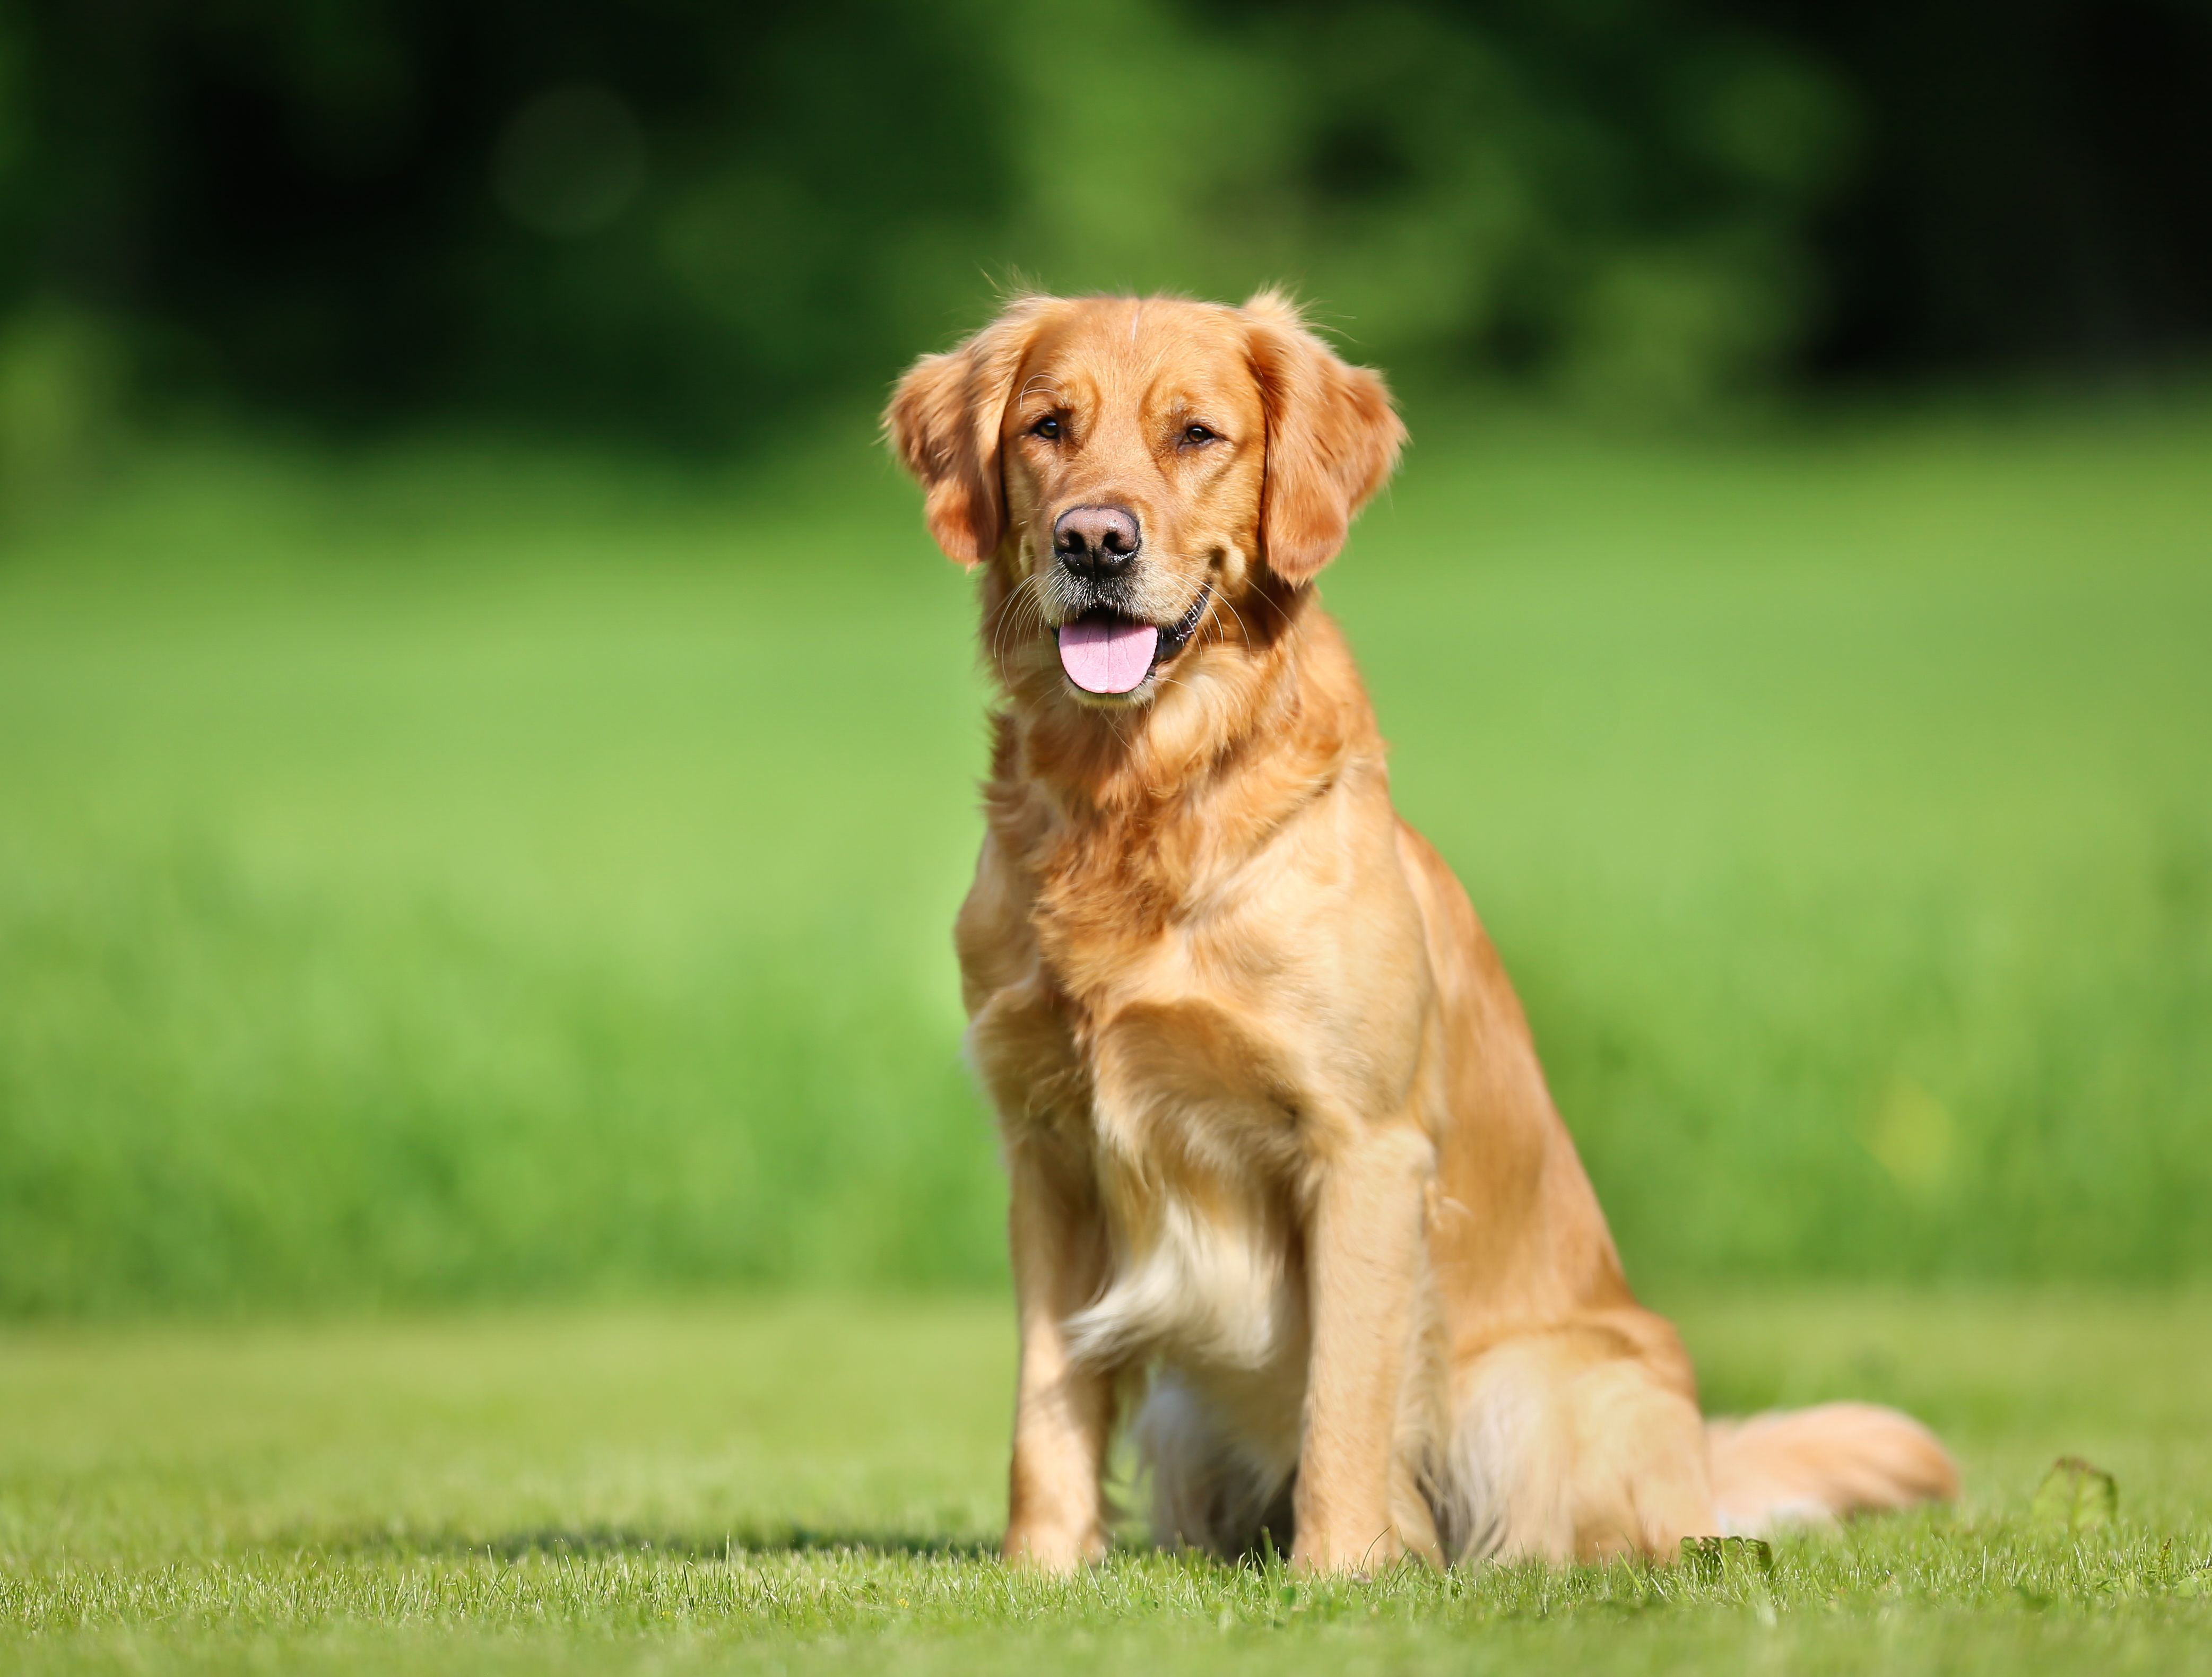

In [29]:
img1 = PILImage.create('C:/Users/Aren/Desktop/real dog.jpg')
img1

In [30]:
predict=learn.predict(img1)
predict

('False', TensorBase(0), TensorBase([1.0000e+00, 2.3476e-07]))

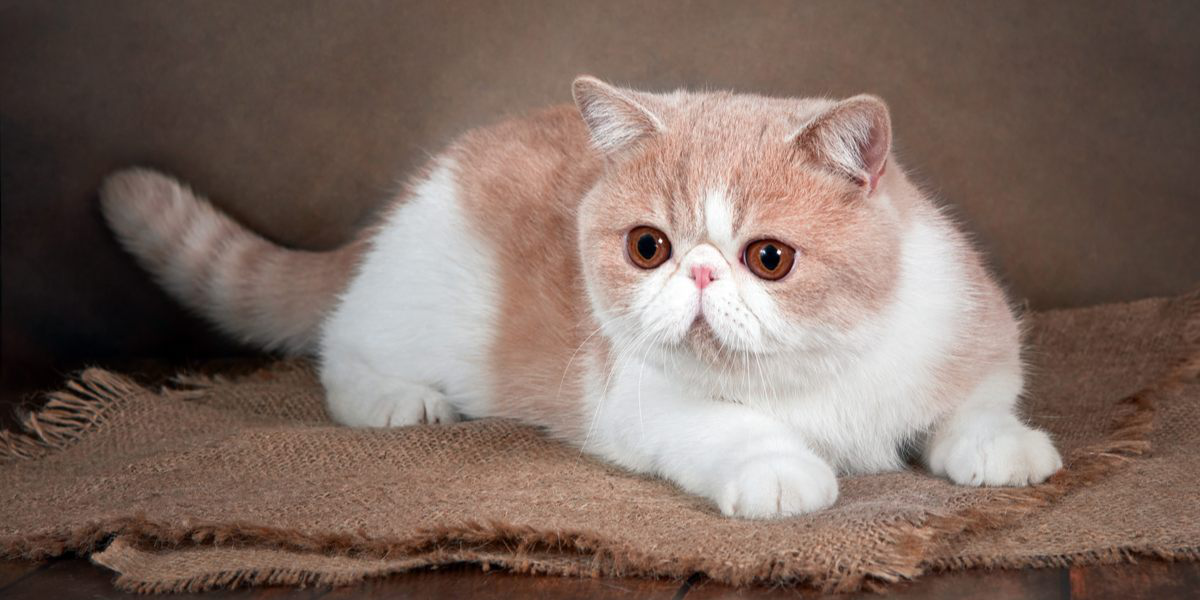

In [31]:
img2 = PILImage.create('C:/Users/Aren/Desktop/cat.jpg')
img2

In [32]:
predict=learn.predict(img2)
predict

('True', TensorBase(1), TensorBase([8.1216e-10, 1.0000e+00]))